<a href="https://colab.research.google.com/github/aem226/Reinforcement-Learning-Projects/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







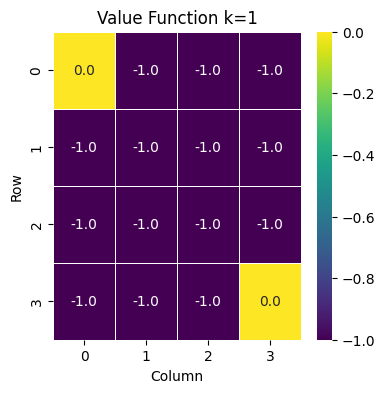

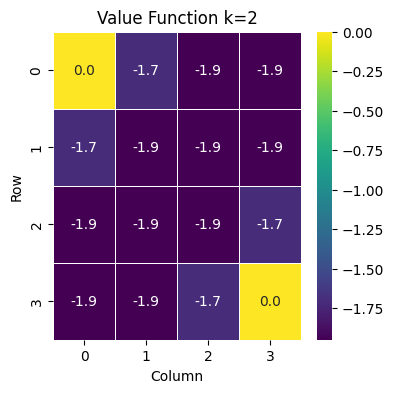

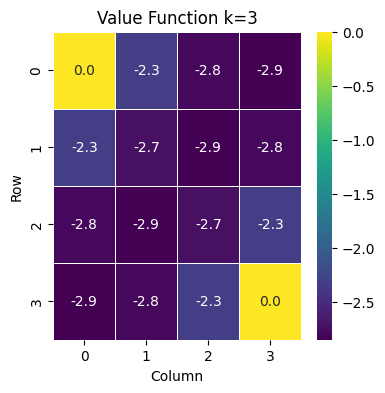

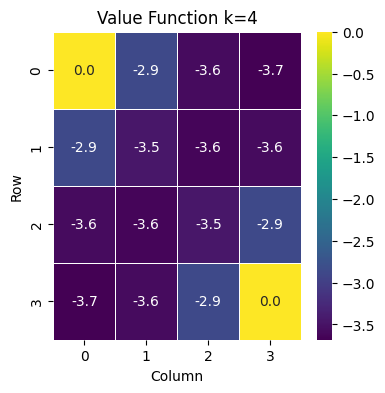

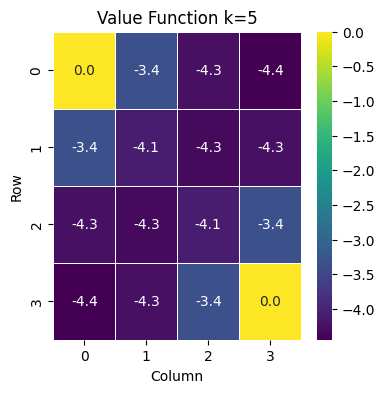

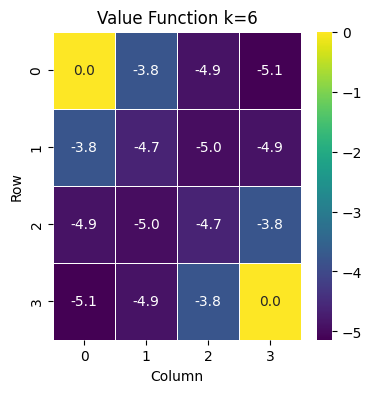

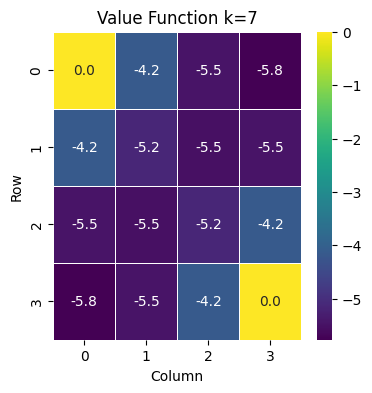

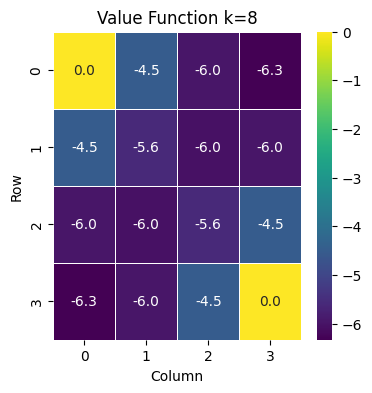

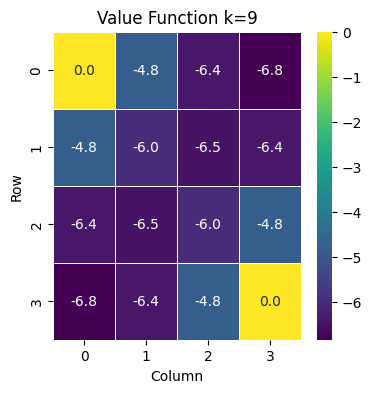

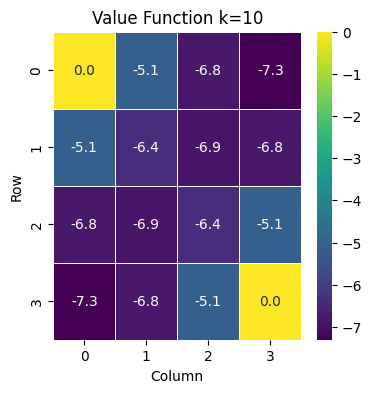

In [10]:


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


V = np.zeros(16)
gamma = 0.95  # Discount factor
V_old = np.zeros(16)

for k in range(10):
  for s in range(16):

    if s==0 or s==15:
      continue

    #### Write your code here #########

      # Uniform random policy
    r, c = divmod(s, 4)
    actions = [(-1,0), (1,0), (0,-1), (0,1)] #This defines the four possible moves (up, down, left, right)
    v = 0.0
    for dr, dc in actions:
        nr = min(3, max(0, r+dr))
        nc = min(3, max(0, c+dc))
        sp = 4*nr + nc
        v += 0.25 * (-1 + gamma * V_old[sp]) #uniform random policy, π(a|s) = ¼.
       #[r + γ V(s')], with reward r = -1

    V[s] = v #Bellman update

  V_old = V.copy()

  ###### PLOT
  # Reshape the 1D value function array into an 8x8 grid
  V_grid = V.reshape((4, 4))

  # Plot the value function as a heatmap
  plt.figure(figsize=(4, 4))
  sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
  plt.title("Value Function k=%d"%(k+1))
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.show()


# Exercise 2: Grid World
Compute the optimal policy




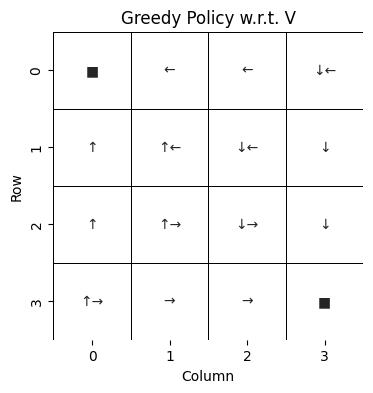

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def greedy_policy_from_V(V, gamma=1.0):
    arrows = {(-1,0): '↑', (1,0): '↓', (0,-1): '←', (0,1): '→'}
    policy = np.empty((4, 4), dtype=object)

    for s in range(16):
        r, c = divmod(s, 4)
        if s in (0, 15):   # terminal states
            policy[r, c] = '■'
            continue

        best_q = -1e9
        best_as = []
        for a in [(-1,0), (1,0), (0,-1), (0,1)]: #defining the possible moves
            # Compute next position after action

            nr = min(3, max(0, r + a[0]))
            nc = min(3, max(0, c + a[1]))
            # Convert back to state index
            sp = 4*nr + nc
            # Compute action-value (Q):
            # Track the best actions
            q = -1 + gamma * V[sp]
            if q > best_q + 1e-9:
                best_q = q
                best_as = [a]
            elif abs(q - best_q) <= 1e-9:
                best_as.append(a)
        # Put all best-action arrows in the cell
        policy[r, c] = ''.join(arrows[a] for a in best_as)

    return policy

# Plot greedy policy as heatmap with arrows
policy = greedy_policy_from_V(V, gamma=1.0)
policy_grid = np.zeros((4,4))

plt.figure(figsize=(4,4))
ax = sns.heatmap(policy_grid, annot=policy, fmt='', cmap="Greys",
                 cbar=False, linewidths=.5, linecolor='black')
plt.title("Greedy Policy w.r.t. V")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()


# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [ ]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

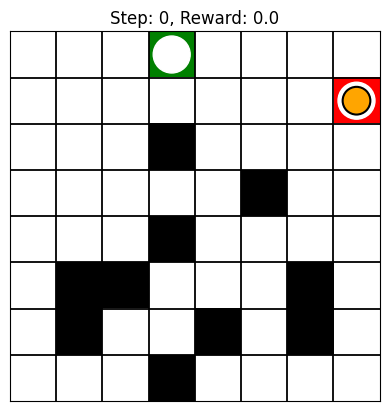

Location (1,6) t=0 reward=0.0
Location (1,7) t=1 reward=0.0
Location (2,7) t=2 reward=0.0
Location (3,7) t=3 reward=0.0
Location (3,6) t=4 reward=0.0
Location (2,6) t=5 reward=0.0
Location (2,5) t=6 reward=0.0
Location (2,5) t=7 reward=-1.0
Location (2,4) t=8 reward=0.0
Location (1,4) t=9 reward=0.0


In [ ]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample()   # Random action
    obs, reward, done, _, info = env.step(action)

    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

# env.close()